In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tanuj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tanuj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('amazon_product_data.csv')
df

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,3.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,This is not the same remote that I got for my ...,I would be disappointed with myself if i produ...,NaN,NaN,GregAmandawith4,NaN,NaN,4 ounces
1593,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,I have had to change the batteries in this rem...,Battery draining remote!!!!,NaN,NaN,Amazon Customer,NaN,NaN,4 ounces
1594,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,"Remote did not activate, nor did it connect to...",replacing an even worse remote. Waste of time,NaN,NaN,Amazon Customer,NaN,NaN,4 ounces
1595,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,3.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,It does the job but is super over priced. I fe...,Overpriced,NaN,NaN,Meg Ashley,NaN,NaN,4 ounces


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1597 non-null   object 
 1   asins                 1597 non-null   object 
 2   brand                 1597 non-null   object 
 3   categories            1597 non-null   object 
 4   colors                774 non-null    object 
 5   dateAdded             1597 non-null   object 
 6   dateUpdated           1597 non-null   object 
 7   dimension             565 non-null    object 
 8   ean                   898 non-null    float64
 9   keys                  1597 non-null   object 
 10  manufacturer          965 non-null    object 
 11  manufacturerNumber    902 non-null    object 
 12  name                  1597 non-null   object 
 13  prices                1597 non-null   object 
 14  reviews.date          1217 non-null   object 
 15  reviews.doRecommend  

In [4]:
df.isnull().sum()

id                         0
asins                      0
brand                      0
categories                 0
colors                   823
dateAdded                  0
dateUpdated                0
dimension               1032
ean                      699
keys                       0
manufacturer             632
manufacturerNumber       695
name                       0
prices                     0
reviews.date             380
reviews.doRecommend     1058
reviews.numHelpful       697
reviews.rating           420
reviews.sourceURLs         0
reviews.text               0
reviews.title             17
reviews.userCity        1597
reviews.userProvince    1597
reviews.username          17
sizes                   1597
upc                      699
weight                   911
dtype: int64

In [5]:
df[['reviews.date','reviews.doRecommend']]

,reviews.date,reviews.doRecommend
0,2015-08-08T00:00:00.000Z,NaN
1,2015-09-01T00:00:00.000Z,NaN
2,2015-07-20T00:00:00.000Z,NaN
3,2017-06-16T00:00:00.000Z,NaN
4,2016-08-11T00:00:00.000Z,NaN
...,...,...
1592,2016-07-06T00:00:00.000Z,NaN
1593,2016-06-22T00:00:00.000Z,NaN
1594,2016-03-31T00:00:00.000Z,NaN
1595,2016-04-26T00:00:00Z,NaN


In [6]:
df['reviews.text']

0       I initially had trouble deciding between the p...
1       Allow me to preface this with a little history...
2       I am enjoying it so far. Great for reading. Ha...
3       I bought one of the first Paperwhites and have...
4       I have to say upfront - I don't like coroporat...
                              ...                        
1592    This is not the same remote that I got for my ...
1593    I have had to change the batteries in this rem...
1594    Remote did not activate, nor did it connect to...
1595    It does the job but is super over priced. I fe...
1596    I ordered this item to replace the one that no...
Name: reviews.text, Length: 1597, dtype: object

In [7]:
df.drop(['colors','dimension','ean','manufacturer','manufacturerNumber','reviews.doRecommend','reviews.numHelpful','reviews.title','reviews.rating','reviews.userCity','reviews.userProvince','reviews.username','sizes','upc','weight'],axis=1,inplace=True)
df = df.dropna()

C:\Users\tanuj\AppData\Local\Temp\ipykernel_63464\3507216274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.DatetimeIndex(df['reviews.date']).year


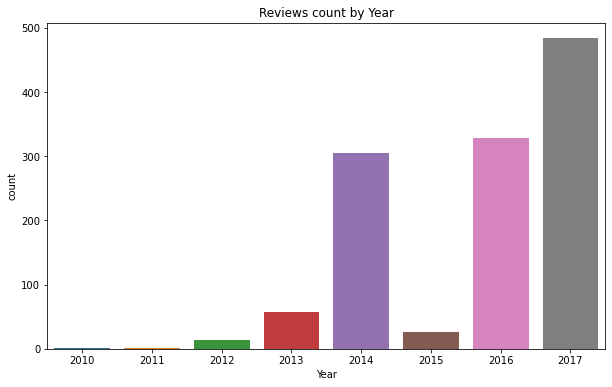

In [28]:
df['year'] = pd.DatetimeIndex(df['reviews.date']).year
plt.figure(figsize=(10,6))
sns.countplot(x ='year', data = df) 
plt.title('Reviews count by Year')
plt.xlabel('Year')
plt.show()

C:\Users\tanuj\AppData\Local\Temp\ipykernel_63464\2973516839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = pd.DatetimeIndex(df['reviews.date']).month


Text(0.5, 0, 'Month')

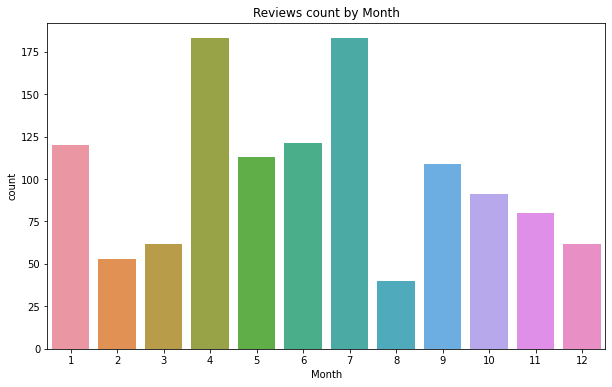

In [9]:
df['month'] = pd.DatetimeIndex(df['reviews.date']).month
plt.figure(figsize=(10,6))
sns.countplot(x ='month', data = df) 
plt.title('Reviews count by Month')
plt.xlabel('Month')

In [10]:
stop_words = stopwords.words()

In [11]:
df['reviews.text'].head()

0    I initially had trouble deciding between the p...
1    Allow me to preface this with a little history...
2    I am enjoying it so far. Great for reading. Ha...
3    I bought one of the first Paperwhites and have...
4    I have to say upfront - I don't like coroporat...
Name: reviews.text, dtype: object

In [12]:
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tanuj\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\tanuj\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [13]:
sentence = df['reviews.text'][0]
sid.polarity_scores(sentence)['compound']

0.9804

In [14]:
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet)
         if w.lower() in words or not w.isalpha())
    return tweet
    

df['tweet_clean'] = df['reviews.text'].apply(cleaner)

C:\Users\tanuj\AppData\Local\Temp\ipykernel_63464\2360857995.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet_clean'] = df['reviews.text'].apply(cleaner)


In [15]:
word_dict = {'manipulate':-1,'manipulative':-1,'jamescharlesiscancelled':-1,'jamescharlesisoverparty':-1,
            'pedophile':-1,'pedo':-1,'cancel':-1,'cancelled':-1,'cancel culture':0.4,'teamtati':-1,'teamjames':1,
            'teamjamescharles':1,'liar':-1}
sid.lexicon.update(word_dict)

list1 = []
for i in df['tweet_clean']:
    list1.append((sid.polarity_scores(str(i)))['compound'])

In [16]:
df['sentiment'] = pd.Series(list1)

def sentiment_category(sentiment):
    label = ''
    if(sentiment>0):
        label = 'positive'
    elif(sentiment == 0):
        label = 'neutral'
    else:
        label = 'negative'
    return(label)

df['sentiment_category'] = df['sentiment'].apply(sentiment_category)

C:\Users\tanuj\AppData\Local\Temp\ipykernel_63464\3403033844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = pd.Series(list1)
C:\Users\tanuj\AppData\Local\Temp\ipykernel_63464\3403033844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_category'] = df['sentiment'].apply(sentiment_category)


In [17]:
category_df = df[['reviews.text','reviews.date','name','sentiment','sentiment_category']]
category_df

,reviews.text,reviews.date,name,sentiment,sentiment_category
0,I initially had trouble deciding between the p...,2015-08-08T00:00:00.000Z,Kindle Paperwhite,0.9760,positive
1,Allow me to preface this with a little history...,2015-09-01T00:00:00.000Z,Kindle Paperwhite,0.9889,positive
2,I am enjoying it so far. Great for reading. Ha...,2015-07-20T00:00:00.000Z,Kindle Paperwhite,0.4364,positive
3,I bought one of the first Paperwhites and have...,2017-06-16T00:00:00.000Z,Kindle Paperwhite,0.9512,positive
4,I have to say upfront - I don't like coroporat...,2016-08-11T00:00:00.000Z,Kindle Paperwhite,0.9946,positive
...,...,...,...,...,...
1592,This is not the same remote that I got for my ...,2016-07-06T00:00:00.000Z,Alexa Voice Remote for Amazon Fire TV and Fire...,NaN,negative
1593,I have had to change the batteries in this rem...,2016-06-22T00:00:00.000Z,Alexa Voice Remote for Amazon Fire TV and Fire...,NaN,negative
1594,"Remote did not activate, nor did it connect to...",2016-03-31T00:00:00.000Z,Alexa Voice Remote for Amazon Fire TV and Fire...,NaN,negative
1595,It does the job but is super over priced. I fe...,2016-04-26T00:00:00Z,Alexa Voice Remote for Amazon Fire TV and Fire...,NaN,negative


In [18]:
neg = category_df[category_df['sentiment_category']=='negative']
neg = neg.groupby(['reviews.date','name'],as_index=False).count()
pos = category_df[category_df['sentiment_category']=='positive']
pos = pos.groupby(['reviews.date','name'],as_index=False).count()

pos = pos[['reviews.date','name']]
neg = neg[['reviews.date','name']]

pos_counts = pos['name'].value_counts().head(5)
neg_counts = neg['name'].value_counts().head(5)

In [19]:
category_df[category_df['sentiment_category']=='positive']

,reviews.text,reviews.date,name,sentiment,sentiment_category
0,I initially had trouble deciding between the p...,2015-08-08T00:00:00.000Z,Kindle Paperwhite,0.9760,positive
1,Allow me to preface this with a little history...,2015-09-01T00:00:00.000Z,Kindle Paperwhite,0.9889,positive
2,I am enjoying it so far. Great for reading. Ha...,2015-07-20T00:00:00.000Z,Kindle Paperwhite,0.4364,positive
3,I bought one of the first Paperwhites and have...,2017-06-16T00:00:00.000Z,Kindle Paperwhite,0.9512,positive
4,I have to say upfront - I don't like coroporat...,2016-08-11T00:00:00.000Z,Kindle Paperwhite,0.9946,positive
...,...,...,...,...,...
1205,Got this on sale for 100! Replaces my 500 cds!...,2016-11-04T00:00:00.000Z,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,0.4738,positive
1207,"hard to use, and does not support Guam. online...",2016-10-30T00:00:00.000Z,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,0.6036,positive
1208,It's great just wish it did not need a button ...,2016-10-30T00:00:00.000Z,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,0.5859,positive
1210,This is such a great product I have two of the...,2016-10-21T00:00:00.000Z,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,0.6369,positive


In [20]:
category_df[category_df['sentiment_category']=='negative']

,reviews.text,reviews.date,name,sentiment,sentiment_category
61,"Having received my Fire TV today, I've been tr...",2014-04-03T00:00:00Z,Certified Refurbished Amazon Fire TV (Previous...,-0.9442,negative
62,I'm your typical middle-aged woman - I don't g...,2014-04-07T00:00:00Z,Certified Refurbished Amazon Fire TV (Previous...,-0.4939,negative
64,An Amazon.com official commented on this revie...,2014-04-06T00:00:00Z,Certified Refurbished Amazon Fire TV (Previous...,-0.9442,negative
68,An Amazon.com official commented on this revie...,2014-04-06T00:00:00Z,Certified Refurbished Amazon Fire TV (Previous...,-0.9442,negative
69,"Having received my Fire TV today, I've been tr...",2014-04-03T00:00:00Z,Certified Refurbished Amazon Fire TV (Previous...,-0.9442,negative
...,...,...,...,...,...
1592,This is not the same remote that I got for my ...,2016-07-06T00:00:00.000Z,Alexa Voice Remote for Amazon Fire TV and Fire...,NaN,negative
1593,I have had to change the batteries in this rem...,2016-06-22T00:00:00.000Z,Alexa Voice Remote for Amazon Fire TV and Fire...,NaN,negative
1594,"Remote did not activate, nor did it connect to...",2016-03-31T00:00:00.000Z,Alexa Voice Remote for Amazon Fire TV and Fire...,NaN,negative
1595,It does the job but is super over priced. I fe...,2016-04-26T00:00:00Z,Alexa Voice Remote for Amazon Fire TV and Fire...,NaN,negative


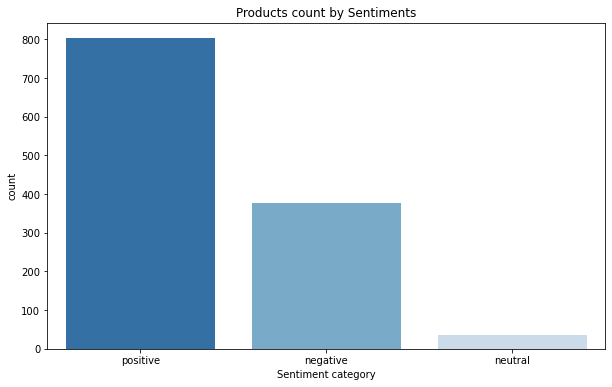

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x =df.sentiment_category, palette='Blues_r')
plt.title('Products count by Sentiments')
plt.xlabel('Sentiment category')
plt.show()

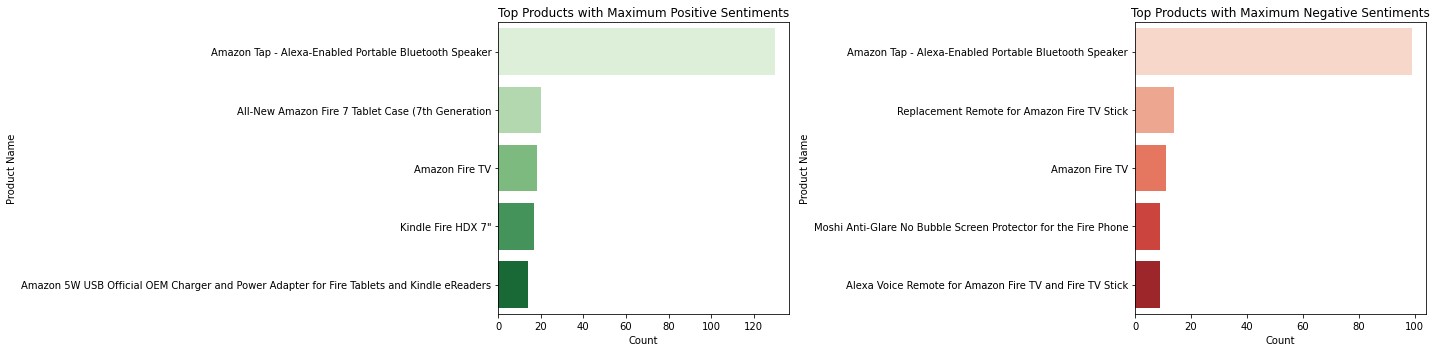

In [22]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=pos_counts.values, y=pos_counts.index, palette='Greens')
plt.title('Top Products with Maximum Positive Sentiments')
plt.xlabel('Count')
plt.ylabel('Product Name')


# Plot for negative sentiments
plt.subplot(1, 2, 2)
sns.barplot(x=neg_counts.values, y=neg_counts.index, palette='Reds')
plt.title('Top Products with Maximum Negative Sentiments')
plt.xlabel('Count')
plt.ylabel('Product Name')


plt.tight_layout()
plt.show()

In [23]:
df.to_csv('Amazon_reviews_by_sentiment_category.csv')